# Opdracht oefenen met Pandas (dataset 'Wildlife Airstrikes')

## Het bestand *wildlife_strikes.csv* bevat data over dieren die in aanraking zijn gekomen met vliegtuigen. Dit is echte data die afkomstig is uit rapporten van de Amerikaanse Federal Aviation Association. Schrijf Python code om de volgende vragen te beantwoorden:

1) Laad het bestand in als DataFrame en toon de eerste 5 rijen van de tabel

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wildlife_strikes = pd.read_csv("wildlife_strikes.csv")
wildlife_strikes.head(5)

,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Mass,Engines,...,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,4.0,2.0,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,4.0,2.0,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


2) Geef de vluchten weer waarbij mensen om het leven zijn gekomen.Toon de volgende kolommen:

  * Incident Year
  * Operator
  * Aircraft
  * Airport
  * Flight Phase
  * Height
  * Speed
  * Species Name
  * Flight Impact
  * Fatalities

In [57]:
columns = ['Incident Year', 'Operator', 'Aircraft', 'Airport', 'Flight Phase', 'Height', 'Speed', 'Species Name', 'Flight Impact', 'Fatalities']
wildlife_strikes.query("Fatalities > 0")[columns]

,Incident Year,Operator,Aircraft,Airport,Flight Phase,Height,Speed,Species Name,Flight Impact,Fatalities
5659,1992,PRIVATELY OWNED,HOMEBUILT,UNKNOWN,EN ROUTE,NaN,NaN,UNKNOWN LARGE BIRD,OTHER,1.0
7986,1993,BUSINESS,BELL 47,UNKNOWN,EN ROUTE,NaN,NaN,UNKNOWN LARGE BIRD,OTHER,1.0
11168,1994,BUSINESS,BELL 47,UNKNOWN,EN ROUTE,NaN,NaN,UNKNOWN MEDIUM BIRD,OTHER,1.0
11601,1994,PRIVATELY OWNED,C-172,UNKNOWN,EN ROUTE,200.0,NaN,BROWN PELICAN,OTHER,1.0
23624,1998,PRIVATELY OWNED,PA-23 APACHE,UNKNOWN,EN ROUTE,1500.0,146.0,UNKNOWN MEDIUM BIRD,OTHER,2.0
38896,2000,ATLANTIC SOUTHEAST,EMB-120,YEAGER ARPT,LANDING ROLL,0.0,105.0,WHITE-TAILED DEER,NaN,1.0
53334,2003,BUSINESS,MILITARY,HILL AIR FORCE BASE,DESCENT,7800.0,300.0,UNKNOWN BIRD,ENGINE SHUT DOWN,1.0
54455,2003,BUSINESS,C-172,UNKNOWN,EN ROUTE,800.0,110.0,UNKNOWN LARGE BIRD,OTHER,2.0
87723,2007,BUSINESS,PA-44 SEMINOLE,UNKNOWN,EN ROUTE,3400.0,150.0,CANADA GOOSE,OTHER,2.0
89477,2008,BUSINESS,CITATION,WILEY POST ARPT,CLIMB,1900.0,NaN,AMERICAN WHITE PELICAN,OTHER,5.0


3) Gebruik matplotlib om een lijngrafiek te maken die het aantal incidenten per jaar toont. Op de x-as staan de jaartallen en op de y-as het aantal incidenten.

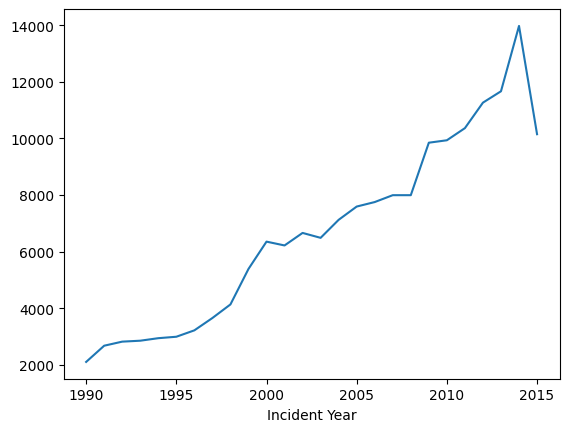

In [58]:
wildlife_strikes.groupby('Incident Year').size().plot()
plt.show()

4) Wat is de hoogste snelheid waarmee een vliegtuig een dier heeft geraakt? Toon van dit incident de volgende kolommen:

  * Incident Year
  * Operator
  * Aircraft
  * Speed
  * Species Name

In [59]:
colums = ['Incident Year', 'Operator', 'Aircraft', 'Airport', 'Speed', 'Species Name']
wildlife_strikes.query("Speed==Speed.max()")[columns]

,Incident Year,Operator,Aircraft,Airport,Flight Phase,Height,Speed,Species Name,Flight Impact,Fatalities
79493,2006,MILITARY,C-21A,HARRISBURG INTL,CLIMB,180.0,2500.0,SWALLOW,NaN,NaN


5) Wat is de gemiddelde hoogte waarop de incidenten plaatsvinden? Laat bij je berekening alle incidenten die op de grond plaatsvinden buiten beschouwing.

In [60]:
wildlife_strikes.query('Height != 0')['Height'].mean()

1408.5852502166201

6) Toon in een staafgrafiek het aantal incidenten per maand. Op de x-as staan dus de maanden, en op de y-as het aantal incidenten.

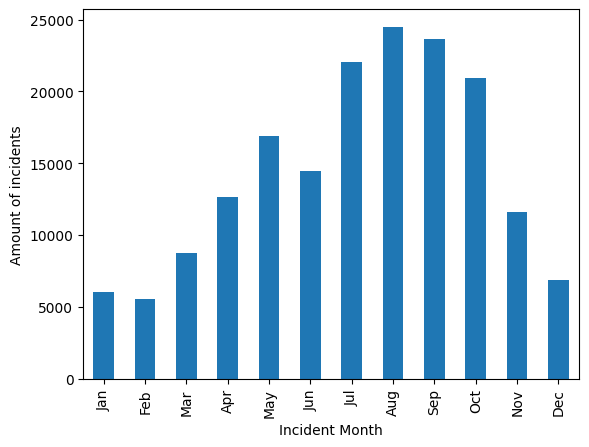

In [61]:
import calendar
wildlife_strikes.groupby('Incident Month').size().plot.bar()
plt.ylabel('Amount of incidents')
plt.xticks(np.arange(12), calendar.month_abbr[1:13])
plt.show()

7) Vinden incidenten 's nachts op een andere hoogte plaats dan overdag? Toon in een staafgrafiek de gemiddelde hoogte waarop incidenten plaatsvonden, uitgesplitst op de kolom 'Visibility'. Op de x-as staat dus de visibility en op de y-as de gemiddelde hoogte.

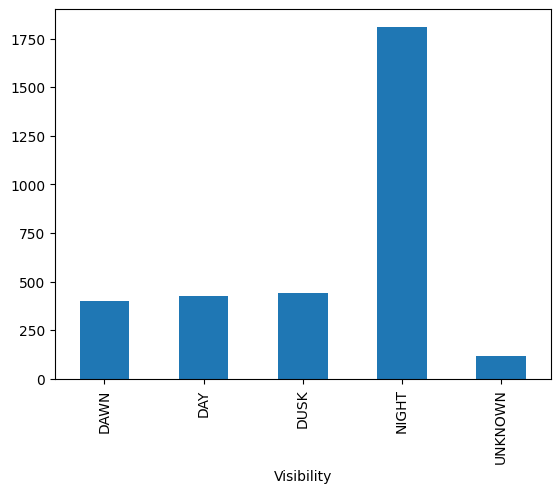

In [62]:
wildlife_strikes.groupby('Visibility')['Height'].mean().plot.bar()
plt.show()

8) Toon alle diersoorten uit de tabel netjes onder elkaar, waarbij ieder dier maar één keer mag voorkomen. Sorteer op alfabetische volgorde.

In [63]:
unique_animals = wildlife_strikes['Species Name'].sort_values().unique()
mask = pd.notnull(unique_animals) 
unique_animals = unique_animals[mask] 
pd.DataFrame(unique_animals)

,0
0,ACADIAN FLYCATCHER
1,ALDER FLYCATCHER
2,ALLEN'S HUMMINGBIRD
3,ALLIGATOR SNAPPING TURTLE
4,AMERICAN ALLIGATOR
5,AMERICAN AVOCET
6,AMERICAN BITTERN
7,AMERICAN BLACK BEAR
8,AMERICAN BLACK DUCK
9,AMERICAN COOT


Het bestand 'birds.txt' bevat Engelse namen van bijna 1000 vogelsoorten. Gebruik dit bestand om de volgende vraag te kunnen maken.

9) Toon alle dieren uit de dataset, die géén vogels zijn. Toon twee kolommen: de naam van het dier en hoe vaak hij voorkomt in de dataset. Sorteer op de tweede kolom (van hoog naar laag).

In [64]:
birds = np.loadtxt("birds.txt", delimiter=',', dtype=str)
not_birds = wildlife_strikes[(~wildlife_strikes['Species Name'].isin(birds)) & (wildlife_strikes['Species Name'].str.contains('BIRD')==False)]
not_birds.groupby('Species Name').size().sort_values(ascending=False)

Species Name
WHITE-TAILED DEER                  1021
MICROBAT                            720
COYOTE                              498
STRIPED SKUNK                       313
BLACK-TAILED JACKRABBIT             279
BRAZILIAN FREE-TAILED BAT           231
VIRGINIA OPOSSUM                    199
RED FOX                             153
RED BAT                             127
LITTLE BROWN BAT                    110
RACCOON                             106
RABBIT                              104
EASTERN COTTONTAIL                   85
MULE DEER                            78
BIG BROWN BAT                        78
VESPER BAT                           74
TURTLE                               66
FOXES                                65
HOARY BAT                            62
FREE-TAILED BATS                     59
SKUNK                                56
SILVER-HAIRED BAT                    52
BLACK-TAILED PRAIRIE DOG             49
DOMESTIC DOG                         46
WHITE-TAILED JACKRABBIT    

10) Er zijn veertien kolommen die aangeven of een onderdeel van het vliegtuig beschadigd is geraakt (van *Radome Damage* t/m *Other Damage*). Laat zien bij welke incidenten het grootste aantal onderdelen van het vliegtuig beschadigd zijn geraakt. Toon de kolommen *Aircraft*, *Species Name* en alle veertien damage kolommen.

In [65]:
damage_columns = ['Radome Damage', 'Windshield Damage', 'Nose Damage', 'Engine1 Damage', 'Engine2 Damage', 
           'Engine3 Damage', 'Engine4 Damage', 'Propeller Damage', 'Wing or Rotor Damage', 
           'Fuselage Damage', 'Landing Gear Damage', 'Tail Damage', 'Lights Damage', 'Other Damage']
show_columns = ['Aircraft', 'Species Name'] + damage_columns
sum_damage = wildlife_strikes[damage_columns].sum(axis=1)
wildlife_strikes[sum_damage == sum_damage.max()][show_columns]

,Aircraft,Species Name,Radome Damage,Windshield Damage,Nose Damage,Engine1 Damage,Engine2 Damage,Engine3 Damage,Engine4 Damage,Propeller Damage,Wing or Rotor Damage,Fuselage Damage,Landing Gear Damage,Tail Damage,Lights Damage,Other Damage
5659,HOMEBUILT,UNKNOWN LARGE BIRD,1,1,1,1,0,0,0,1,1,1,1,1,1,1
5691,G-164 AG CAT,UNKNOWN MEDIUM BIRD,1,1,1,1,0,0,0,1,1,1,1,1,1,1
34429,C-310,CANADA GOOSE,0,1,1,1,1,0,0,1,1,1,1,1,1,1
39213,LEARJET-60,WHITE-TAILED DEER,1,1,1,1,1,0,0,0,1,1,1,1,1,1
51745,LEARJET-36,WAPITI (ELK),1,1,1,1,1,0,0,1,1,1,1,1,1,0
57889,LEARJET-24,UNKNOWN SMALL BIRD,1,1,1,1,1,0,0,1,1,1,1,1,1,0
91033,B-747-1/200,EURASIAN KESTREL,1,0,1,1,1,1,1,0,1,1,1,1,1,0


11) Toon van alle diersoorten die in de dataset voorkomen de volgende gegevens:
* de maximale hoogte waarop een individu van de soort in aanraking is gekomen met een vliegtuig
* de minimale hoogte
* de gemiddelde hoogte
* het aantal incidenten waarbij deze diersoort betrokken was

Zorg dat je alle incidenten die op de grond (height=0) plaatsvinden niet meeneemt. Sorteer op de maximale hoogte (van hoog naar laag).

De geoorde fuut (eared grebe, *Podiceps nigricollis*) vliegt volgens de IUCN (International Union for Conservation of Nature) op een maximale hoogte van 2500 meter ([link](http://www.iucnredlist.org/details/22696610/0)). De *wildlife strikes* dataset toont de hoogte in *feet*. Geeft deze dataset reden om ons beeld van deze fuut bij te stellen?

In [71]:
species = wildlife_strikes.query('Height > 0').groupby('Species Name')
species['Height'].agg(['max', 'min', 'mean', 'count']).sort_values(by='max', ascending=False)

,max,min,mean,count
Species Name,,,,
UNKNOWN BIRD,31300.0,1.0,2193.074914,2029
UNKNOWN MEDIUM BIRD,30000.0,1.0,2113.619301,15792
UNKNOWN SMALL BIRD,25000.0,1.0,1325.001366,19764
UNKNOWN LARGE BIRD,23000.0,1.0,2539.885455,2200
LESSER YELLOWLEGS,20000.0,1700.0,9925.000000,4
EARED GREBE,20000.0,20000.0,20000.000000,1
UNKNOWN BIRDS,20000.0,1.0,1495.545704,1455
GULL,16000.0,1.0,564.007029,3130
WHITE-THROATED SPARROW,15000.0,75.0,2162.735849,53


12) Hoeveel incidenten hebben plaatsgevonden waarbij een dier betrokken was dat begint met de letter 'Z'?

In [72]:
incidents = wildlife_strikes[pd.notnull(wildlife_strikes['Species Name'])]
len(incidents[incidents['Species Name'].str.startswith("Z")])

294